PROJECT1
STUDENT PERFORMANCE INDEX PREDICTION MODEL

Importing Libraries

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
df=pd.read_csv("Student_Performance.csv")

In [21]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


Splitting the data into independent and dependent variable

In [22]:
x=df[["Hours Studied","Previous Scores","Extracurricular Activities","Sleep Hours","Sample Question Papers Practiced"]]

In [23]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [24]:
y=df["Performance Index"]

In [25]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

Data visualisation

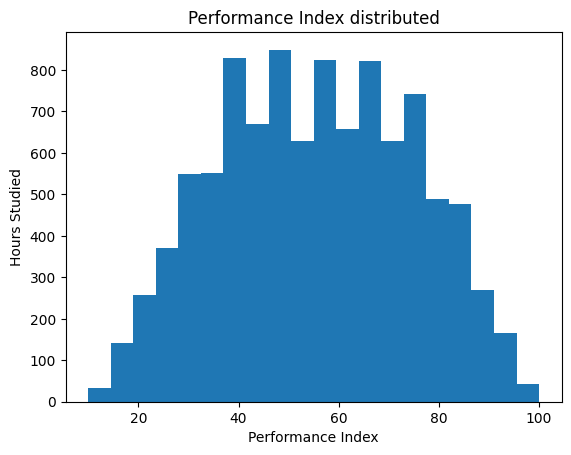

In [26]:
plt.hist(df['Performance Index'].dropna(), bins=20)
plt.xlabel('Performance Index')
plt.ylabel('Hours Studied')
plt.title('Performance Index distributed')
plt.show()

Making all the data to integer

In [31]:
x['Extracurricular Activities'] = x['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

Splitting training and testing data

In [32]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1)

In [33]:
model=LinearRegression()

In [34]:
model.fit(train_x,train_y)

LinearRegression()

In [35]:
model.score(test_x,test_y)

0.9888368725061238

Inputting the data values for prediction

In [37]:
hrsstudied=int(input("Enter the hours studied: "))
prescore=int(input("Enter Previous Scores: "))
exact=int(input("Enter 1 for yes, 0 for no: "))
sleephrs=int(input("Enter the no. of hours slept:"))
qpp=int(input("Enter the no. of papers:"))
performindx=model.predict([[hrsstudied,prescore,exact,sleephrs,qpp]])
print("Performance Index is: ",performindx)

Enter the hours studied:  7
Enter Previous Scores:  99
Enter 1 for yes, 0 for no:  1
Enter the no. of hours slept: 7
Enter the no. of papers: 33


Performance Index is:  [96.88160094]


Finding mean squared error

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
y_pred = model.predict(test_x)
mse = mean_squared_error(test_y, y_pred)

In [40]:
print("Mean Squared Error is:",mse)

Mean Squared Error is: 4.26491741107721


Importing the model for deployement

In [41]:
import pickle

In [43]:
pickle.dump(model,open("performanceidx.pkl","wb"))